<a href="https://colab.research.google.com/github/ganeshap1995/Internsavy/blob/main/InternSavy__Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

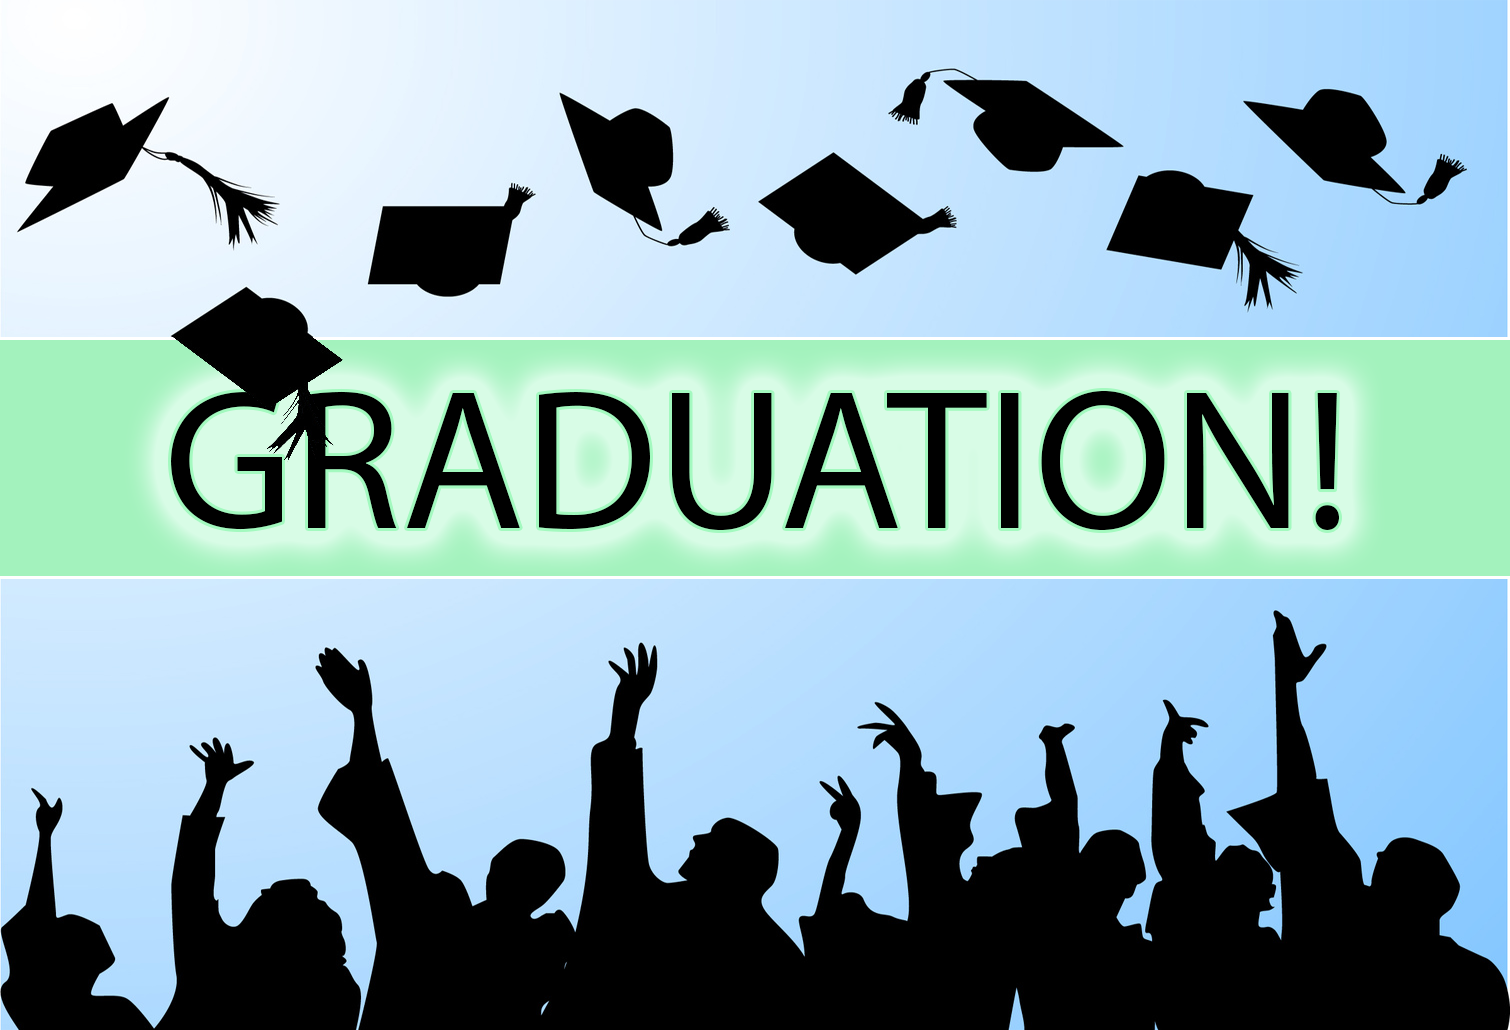

#**Project Name:** Use classification technique for prediction of Graduate Admissions from an Indian perspective.
#**Author Name:** Ganesh Arjun Patewar
#**Dataset_link:**(https://www.kaggle.com/datasets/mohansacharya/graduate-admissions)
#**Project description:**
##In this project, we are given data for 400 students, which includes their marks/scores in various exams such as GRE, TOEFL, University Rating, Statement of Purpose (SOP), CGPA, and Research experience. Our goal is to determine whether a student is eligible for admission to a graduate program. We will use various classification algorithms to build a model that can accurately classify students as eligible or not eligible for admission.

####Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

##Knowing the dataset:

####Importing the dataset

In [2]:
df=pd.read_csv('/content/drive/MyDrive/DATA SCIENCE/Python All/csv/Admission_Predict.csv')

The parameters included are :

GRE Scores (out of 340 )

TOEFL Scores ( out of 120 )

University Rating ( out of 5 )

Statement of Purpose and Letter of Recommendation Strength ( out of 5 )

Undergraduate GPA ( out of 10 )

Research Experience ( either 0 or 1 )

Chance of Admit ( ranging from 0 to 1 )

####First look of data

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


####Shape of data

In [4]:
df.shape

(400, 9)

####Info of data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


####Data description

In [6]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


##EDA:

####Checking null values and duplicates

In [7]:
# Checking the null values
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

There is no any null value in any of the column.

In [8]:
# Checking the duplicate values
df.duplicated().sum()

0

There is no any duplicate value in this table.

####Dropping the extra column:

In [9]:
df=df.drop('Serial No.',axis=1)

In [10]:
# New look of dataset
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


####Unique values of every feature

In [11]:
pd.Series({ col: df[col].unique() for col in df})

GRE Score            [337, 324, 316, 322, 314, 330, 321, 308, 302, ...
TOEFL Score          [118, 107, 104, 110, 103, 115, 109, 101, 102, ...
University Rating                                      [4, 3, 2, 5, 1]
SOP                      [4.5, 4.0, 3.0, 3.5, 2.0, 5.0, 1.5, 1.0, 2.5]
LOR                      [4.5, 3.5, 2.5, 3.0, 4.0, 1.5, 2.0, 5.0, 1.0]
CGPA                 [9.65, 8.87, 8.0, 8.67, 8.21, 9.34, 8.2, 7.9, ...
Research                                                        [1, 0]
Chance of Admit      [0.92, 0.76, 0.72, 0.8, 0.65, 0.9, 0.75, 0.68,...
dtype: object

##Data visualization:

In [12]:
# dependent variable
dependent_var=['Chance of Admit ']

In [13]:
# Independent variable
columns=list(df.columns)
independent_var=columns[:-1]
independent_var

['GRE Score',
 'TOEFL Score',
 'University Rating',
 'SOP',
 'LOR ',
 'CGPA',
 'Research']

####Chart1: Violinplot and Distplot :

Feature name: GRE Score
Skewness of GRE Score is -0.0628934593601882


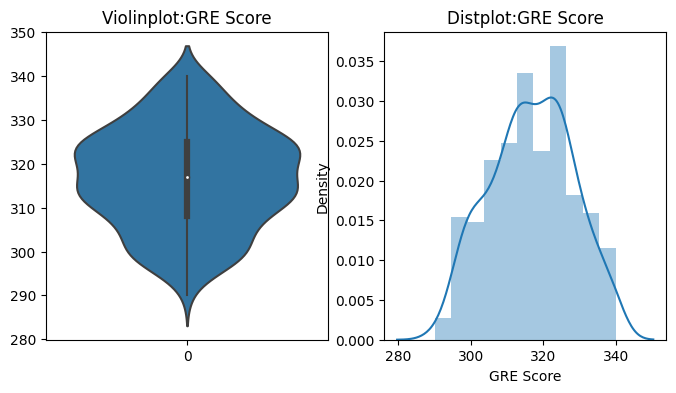

Feature name: TOEFL Score
Skewness of TOEFL Score is 0.05721591369844269


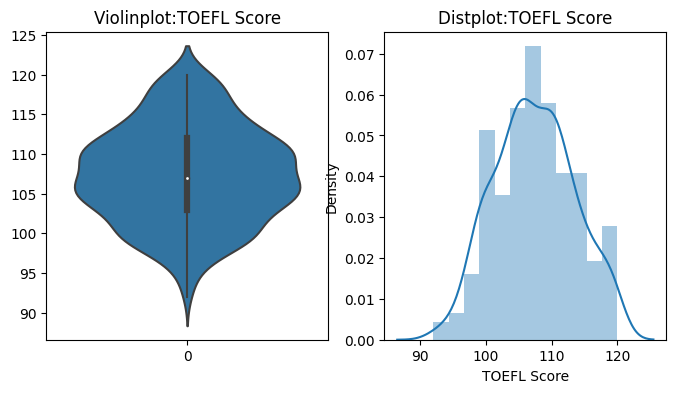

Feature name: University Rating
Skewness of University Rating is 0.17126027744362737


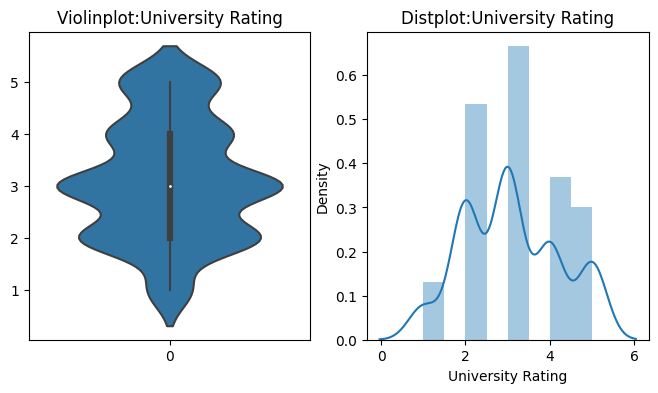

Feature name: SOP
Skewness of SOP is -0.27576116806333434


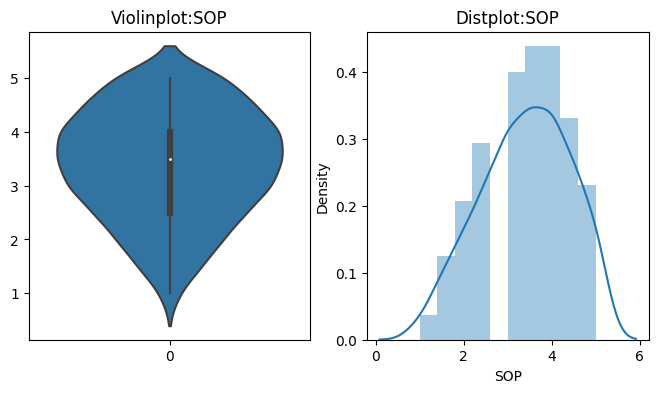

Feature name: LOR 
Skewness of LOR  is -0.10699147866617165


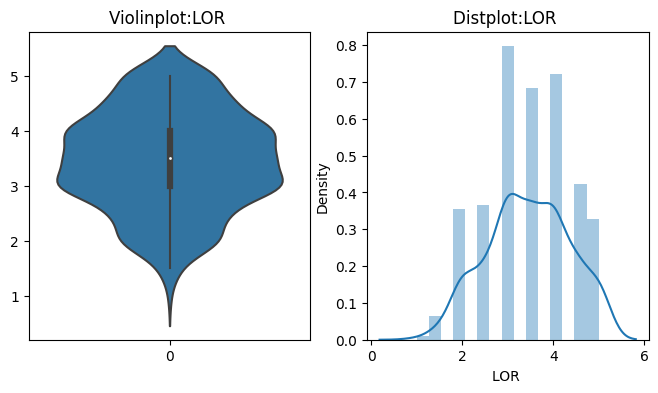

Feature name: CGPA
Skewness of CGPA is -0.06599054377889167


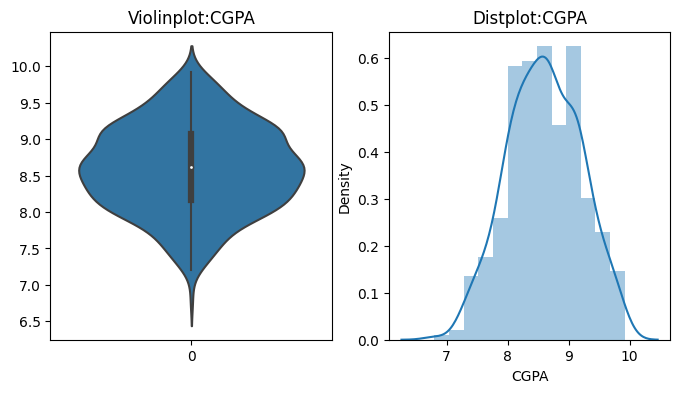

Feature name: Research
Skewness of Research is -0.19158240605436225


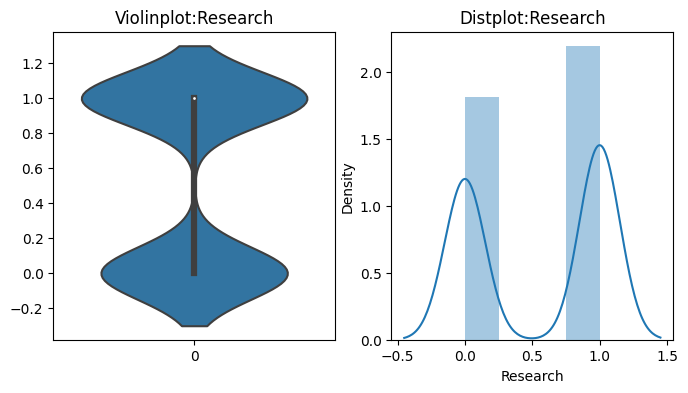

In [14]:
for col in independent_var:
  print(f'Feature name: {col}')
  print(f'Skewness of {col} is {df[col].skew()}')

  plt.figure(figsize=(8,4))

  plt.subplot(1,2,1)
  sns.violinplot(df[col])
  plt.title('Violinplot:' + col)

  plt.subplot(1,2,2)
  sns.distplot(df[col])
  plt.title('Distplot:' + col)

  plt.show()


####Chart 2 : lmplot of independent variable

lmplot for GRE Score


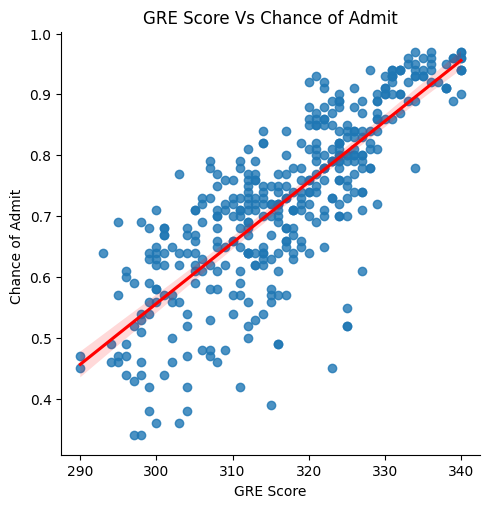

lmplot for TOEFL Score


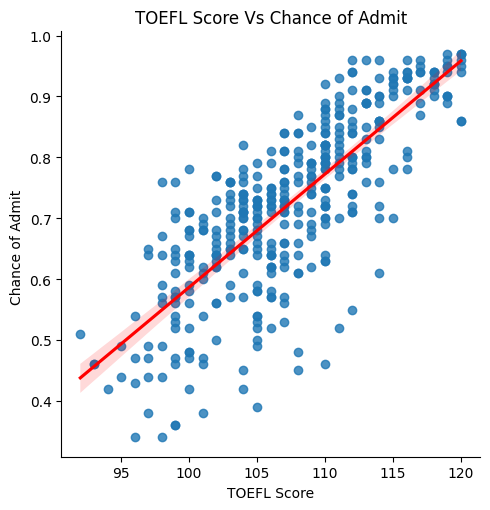

lmplot for University Rating


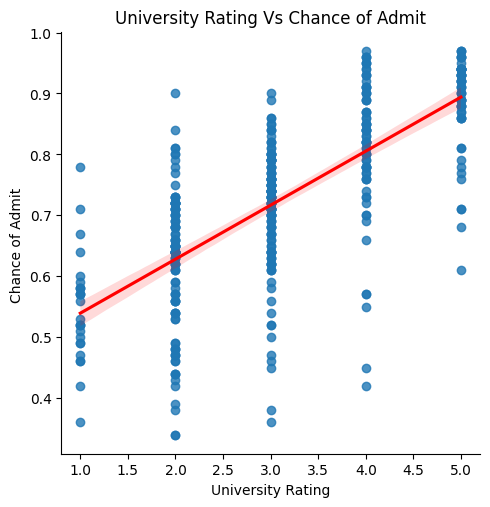

lmplot for SOP


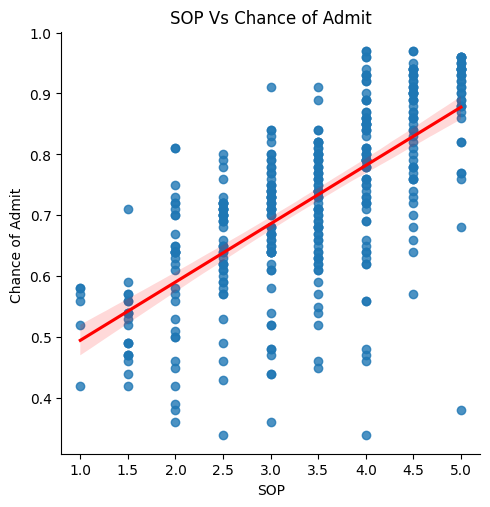

lmplot for LOR 


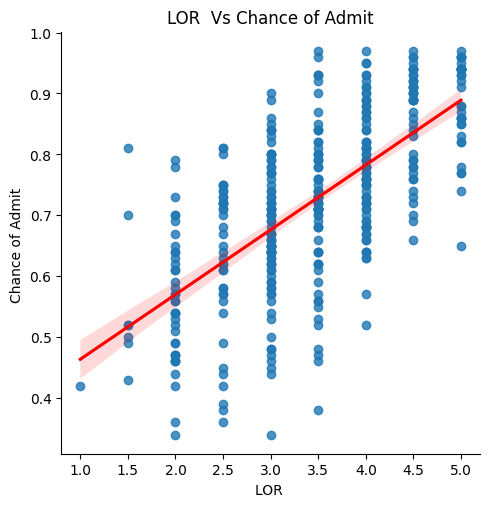

lmplot for CGPA


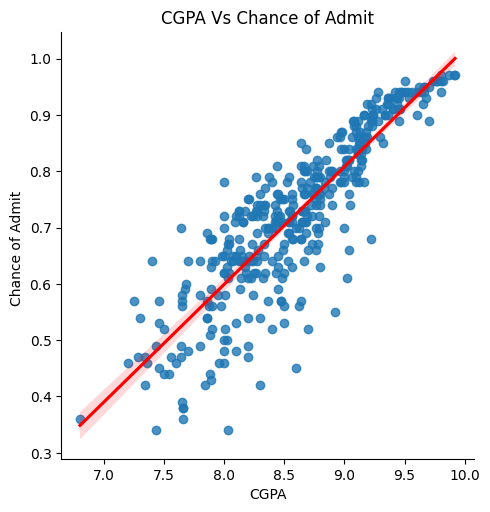

lmplot for Research


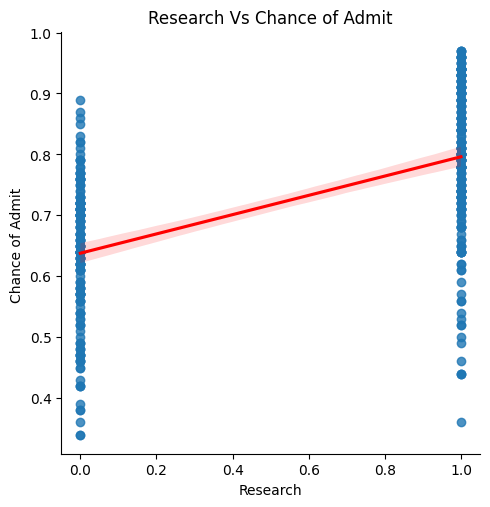

In [15]:
for col in independent_var:
  print(f'lmplot for {col}')

  sns.lmplot(x=col, y='Chance of Admit ', data=df, line_kws={'color':'red'})
  plt.title(col+ ' '  + 'Vs Chance of Admit')
  plt.show()

####Chart 3: Heatmap:

<Axes: >

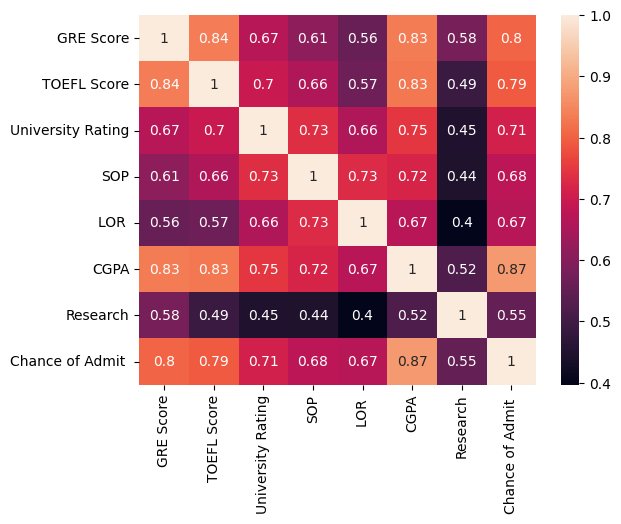

In [16]:
sns.heatmap(df.corr(),annot=True)

####Chart 4: Paiplot:

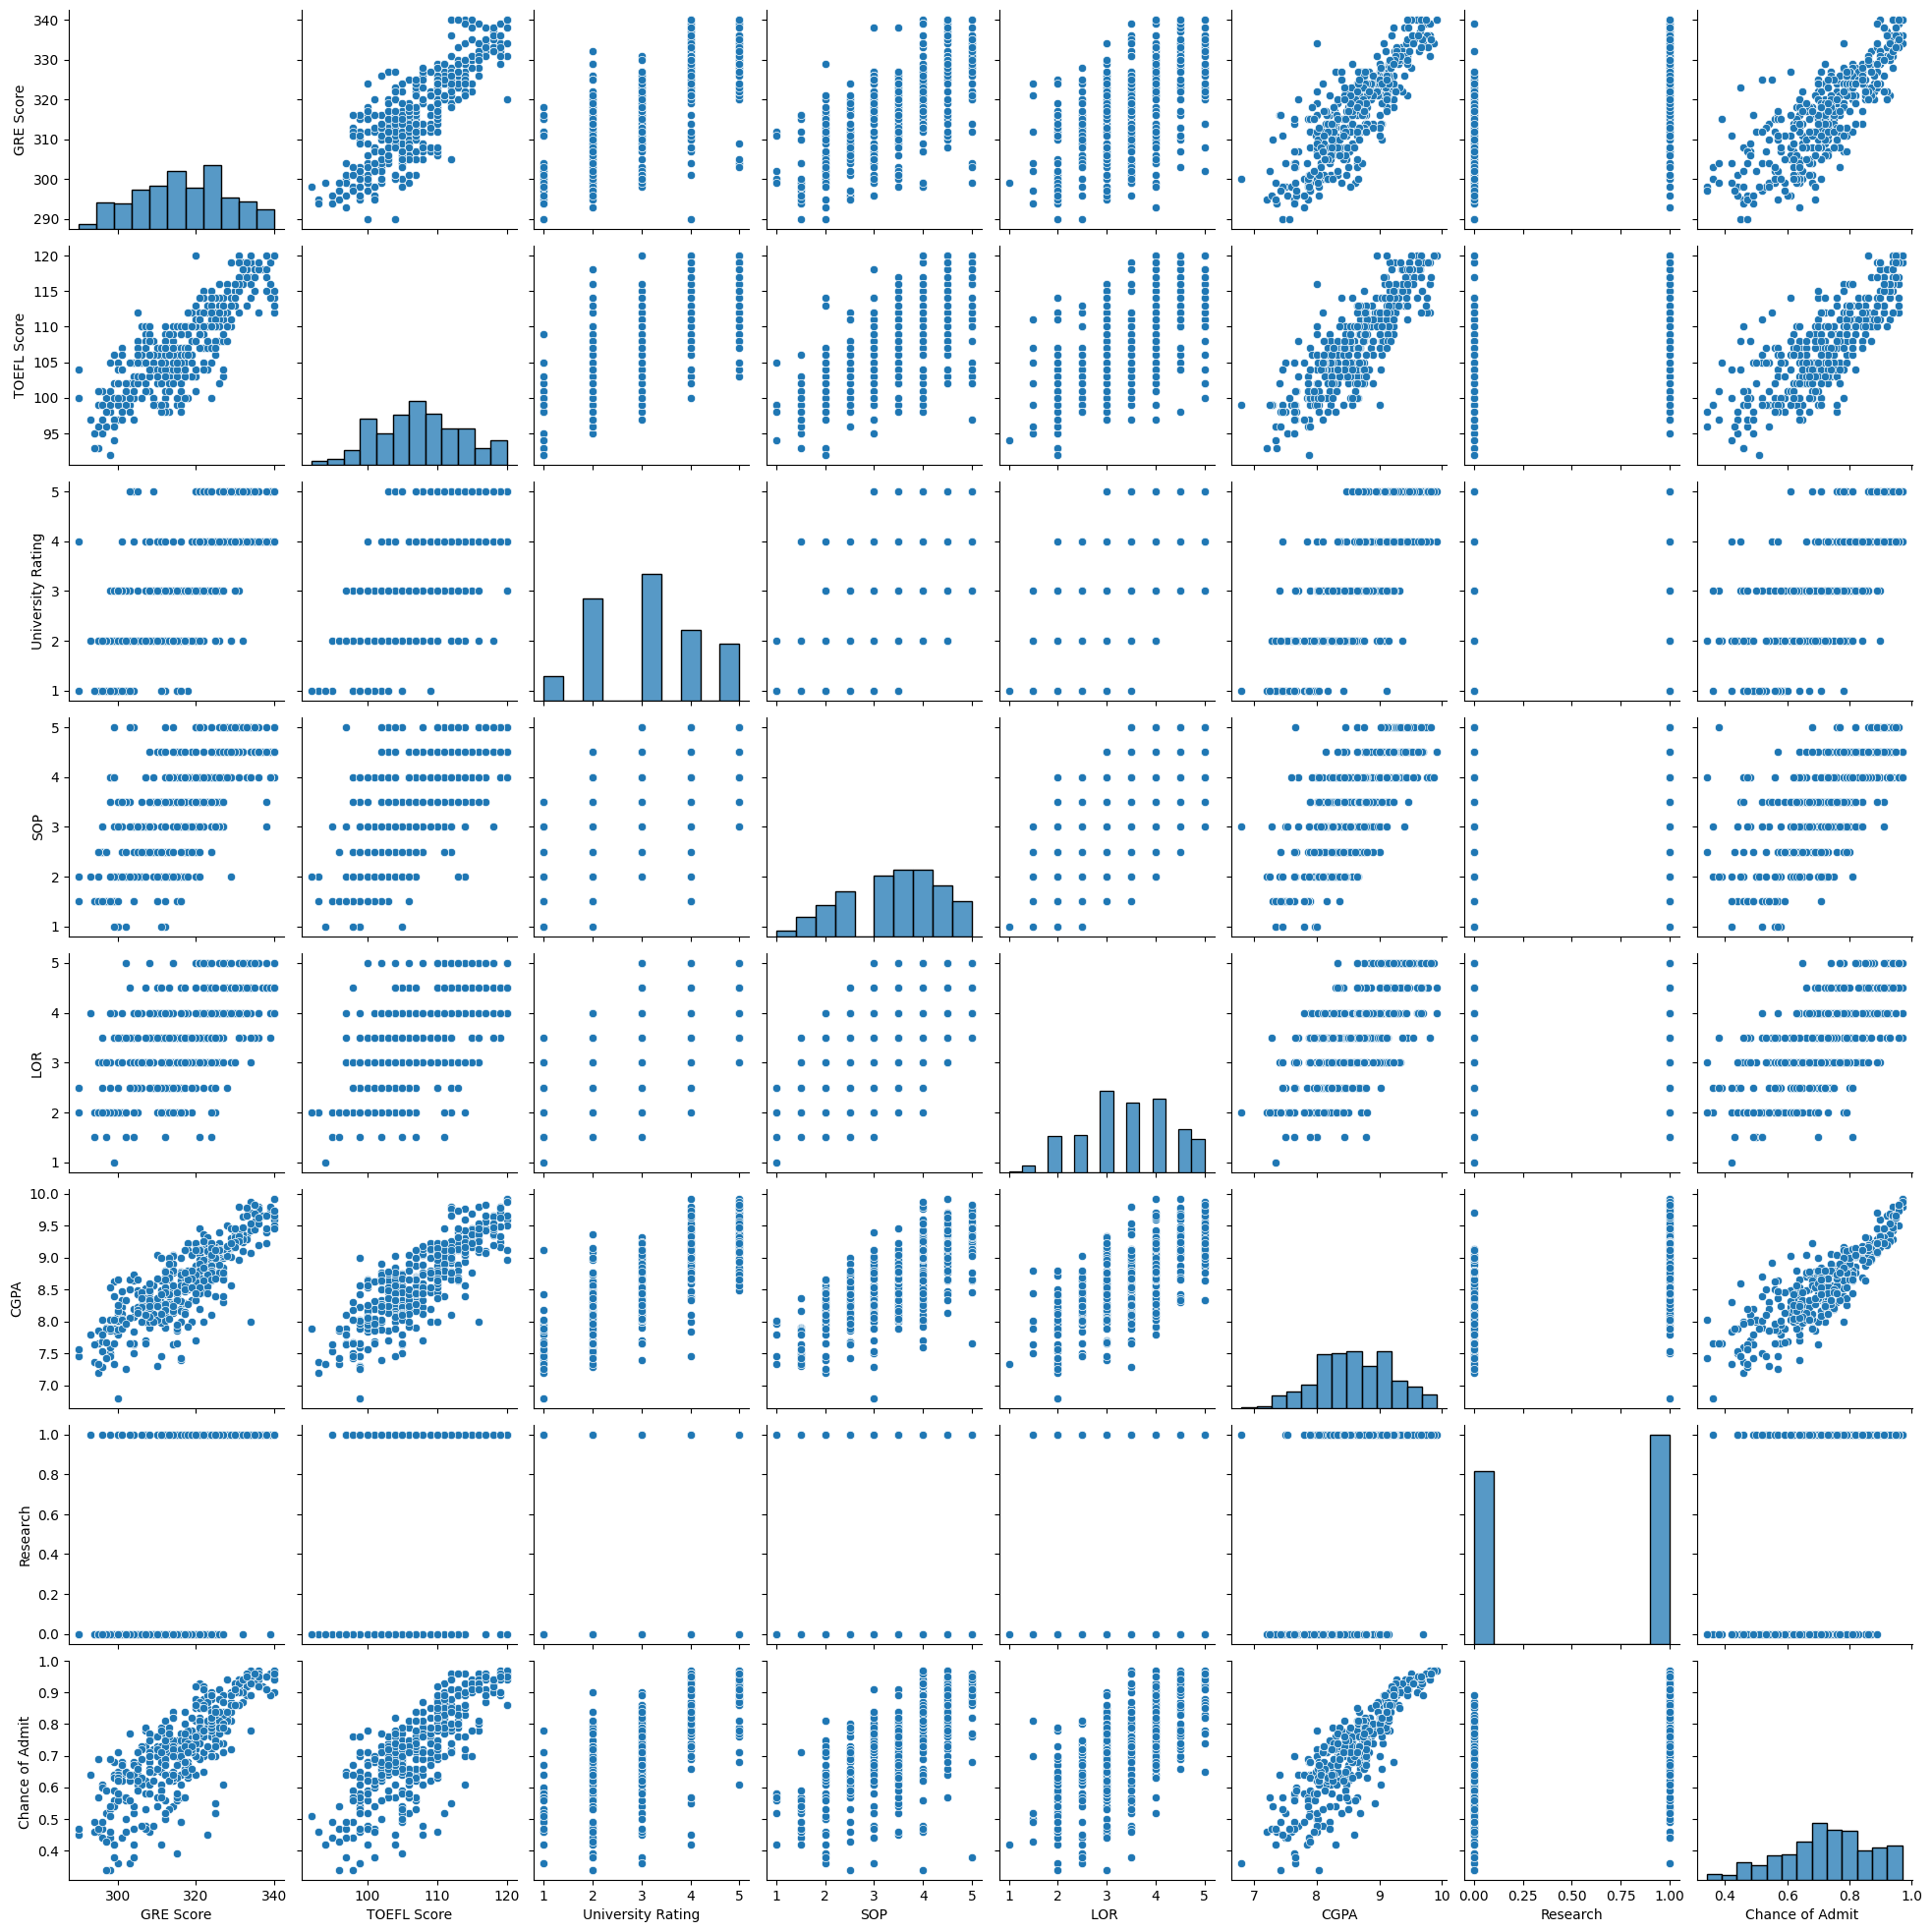

In [17]:
sns.pairplot(df)

##Model building:

In [18]:
X=df[independent_var]
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [47]:
''' Here column 'Chance of Admit' is dependent column. For further simplification in classification
algorithms I am converting value above 0.75 as 1 and below 0.75 as 0.  '''


y=df.iloc[:,-1].apply(lambda y_value : 1 if y_value >=0.75 else 0)
y.head()

0    1
1    1
2    0
3    1
4    0
Name: Chance of Admit , dtype: int64

####Splitting the data into test and train dataset:

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=123)

In [22]:
print(f'X_train: {X_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_test: {y_test.shape}')

X_train: (320, 7)
X_test: (80, 7)
y_train: (320,)
y_test: (80,)


####Using lazypredict for understanding best suitable algorithms for this data:

To identify the best algorithms for the given dataset that offer high accuracy and require less computation time, I am utilizing the lazy predict library. This library allows for a quick analysis of multiple algorithms and their corresponding accuracy scores, providing insights into the most effective options for classification.

In [23]:
pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
import lazypredict

In [25]:
from lazypredict.Supervised import LazyClassifier

In [26]:
clf=LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

In [27]:
models,predictions= clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [00:03<00:00,  8.97it/s]


In [28]:
print(models)

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
ExtraTreesClassifier               0.95               0.95     0.95      0.95   
SVC                                0.94               0.94     0.94      0.94   
NuSVC                              0.94               0.94     0.94      0.94   
LogisticRegression                 0.94               0.94     0.94      0.94   
RandomForestClassifier             0.94               0.93     0.93      0.94   
BernoulliNB                        0.93               0.92     0.92      0.93   
AdaBoostClassifier                 0.93               0.92     0.92      0.92   
LinearSVC                          0.93               0.92     0.92      0.92   
LGBMClassifier                     0.93               0.92     0.92      0.92   
CalibratedClassifierCV             0.93               0.92     0.92      0.92   
BaggingClassifier           

##Various algorithms and score:

In [29]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [30]:
classifier=[['ExtraTreesClassifier',ExtraTreesClassifier()],
            ['SVC',SVC()],
            ['LogisticRegression',LogisticRegression()],
            ['RandomForestClassifier',RandomForestClassifier()],
            ['AdaBoostClassifier',AdaBoostClassifier()],
            ['KNeighborsClassifier',KNeighborsClassifier()],
            ['DecisionTreeClassifier',DecisionTreeClassifier()]]

In [31]:
for name,model in classifier:
  model = model
  model.fit(X_train,y_train)
  print(f'Train accuracy of {name} is {model.score(X_train,y_train)}')
  print(f'Test accuracy of {name} is {model.score(X_test,y_test)}')

Train accuracy of ExtraTreesClassifier is 1.0
Test accuracy of ExtraTreesClassifier is 0.9125
Train accuracy of SVC is 0.84375
Test accuracy of SVC is 0.9
Train accuracy of LogisticRegression is 0.85
Test accuracy of LogisticRegression is 0.8875
Train accuracy of RandomForestClassifier is 1.0
Test accuracy of RandomForestClassifier is 0.9375
Train accuracy of AdaBoostClassifier is 0.90625
Test accuracy of AdaBoostClassifier is 0.925
Train accuracy of KNeighborsClassifier is 0.878125
Test accuracy of KNeighborsClassifier is 0.9
Train accuracy of DecisionTreeClassifier is 1.0
Test accuracy of DecisionTreeClassifier is 0.8375


####From the above analysis of accuracy scores for various algorithms on both the train and test data, it is evident that the ExtraTreeClassifier performs exceptionally well. Considering its superior performance, I have decided to select the ExtraTreeClassifier for classifying the given dataset.

##Is following students are eligible or not for graduation admission?

In [32]:
ETClassifier=ExtraTreesClassifier()

In [33]:
ETClassifier.fit(X_train,y_train)

ExtraTreesClassifier()







**Student 1:** Scores or ratings are as follows-

GRE Score= 320

TOEFL Score = 120

University Rating = 4

SOP =4.5

LOR =4

CGPA =9.5

Research = 0

In [49]:
predict=ETClassifier.predict([[320,120,4,4.5,4,9.5,0]])
if predict==1:
  print('Congratulations !!! You are qualified for getting admission in Graduation')
else:
  print('Sorry! Best of luck for your')


Congratulations !!! You are qualified for getting admission in Graduation


**Student 2:** Scores or ratings are as follows-

GRE Score= 316

TOEFL Score = 104

University Rating = 4

SOP =3

LOR =3.5

CGPA =8.5

Research = 1

In [48]:
predict=ETClassifier.predict([[316,104,4,3,3.5,8.5,1]])
if predict==1:
  print('Congratulations !!! You are qualified for getting admission in Graduation')
else:
  print('Sorry! Best of luck for your future.')

Sorry! Best of luck for your future.
